In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTInOut import from_YAML

import yaml

from IPython.display import display, Javascript, HTML, Image

parser = load_parser()

pictures_dir = "pictures/SEMS/"

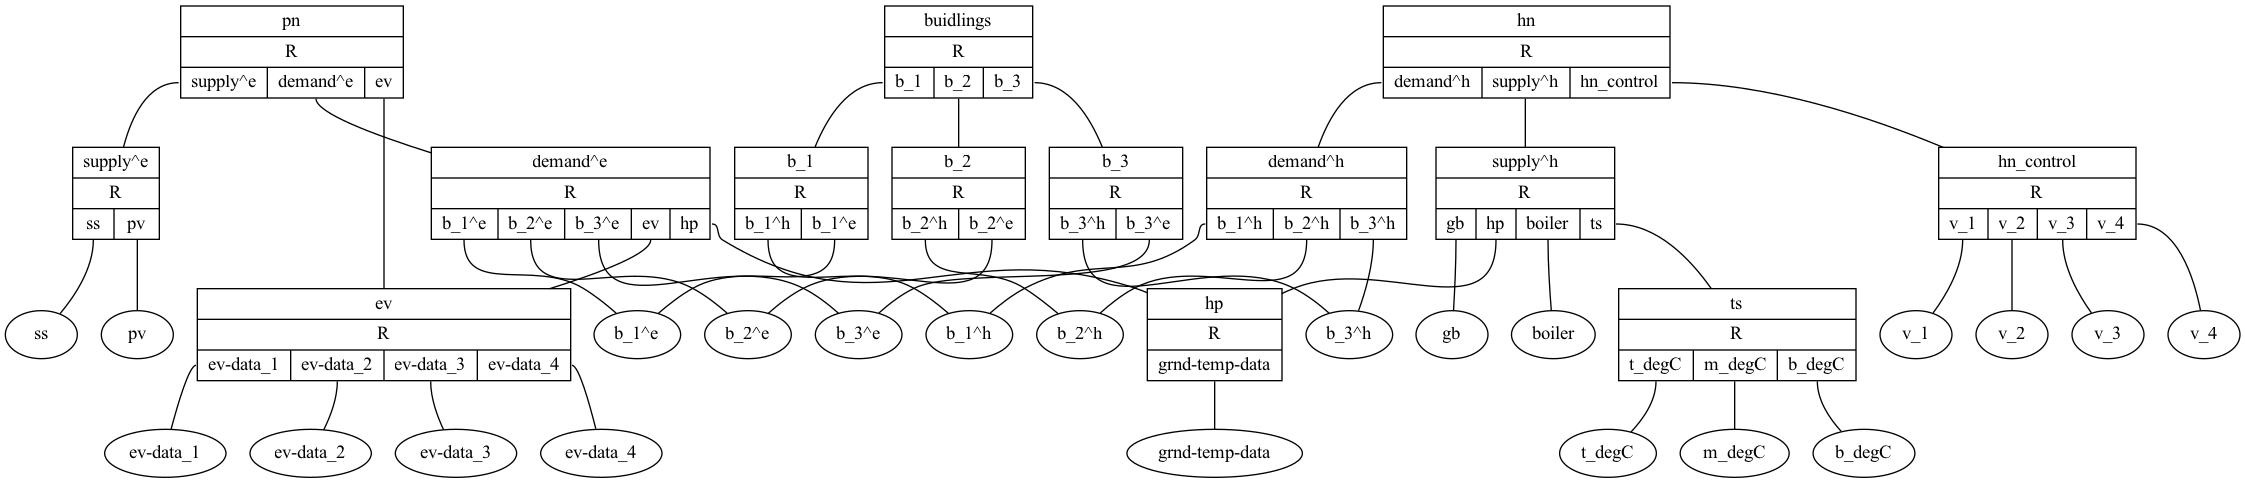

In [2]:
greenwich_hn = Hypernetwork()

compile_hn(greenwich_hn, parser, """
    ev=<ev-data_1, ev-data_2, ev-data_3, ev-data_4; R>
    ts=<t_degC, m_degC, b_degC; R>
    hn=<demand^h, supply^h, hn_control; R>
    hn_control=<v_1, v_2, v_3, v_4; R>
    pn=<supply^e, demand^e, ev; R>
    hp=<grnd-temp-data; R>
    
    buidlings=<b_1, b_2, b_3; R>
    demand^e=<b_1^e, b_2^e, b_3^e, ev, hp; R>
    demand^h=<b_1^h, b_2^h, b_3^h; R>
    
    supply^h=<gb, hp, boiler, ts; R>
    supply^e=<ss, pv; R>

    b_1=<b_1^h, b_1^e; R>
    b_2=<b_2^h, b_2^e; R>
    b_3=<b_3^h, b_3^e; R>
""")

draw_hn(greenwich_hn, fname=pictures_dir+"greenwich-hn", view=False)
Image(filename=pictures_dir+'greenwich-hn.png', width=1000, height=600)

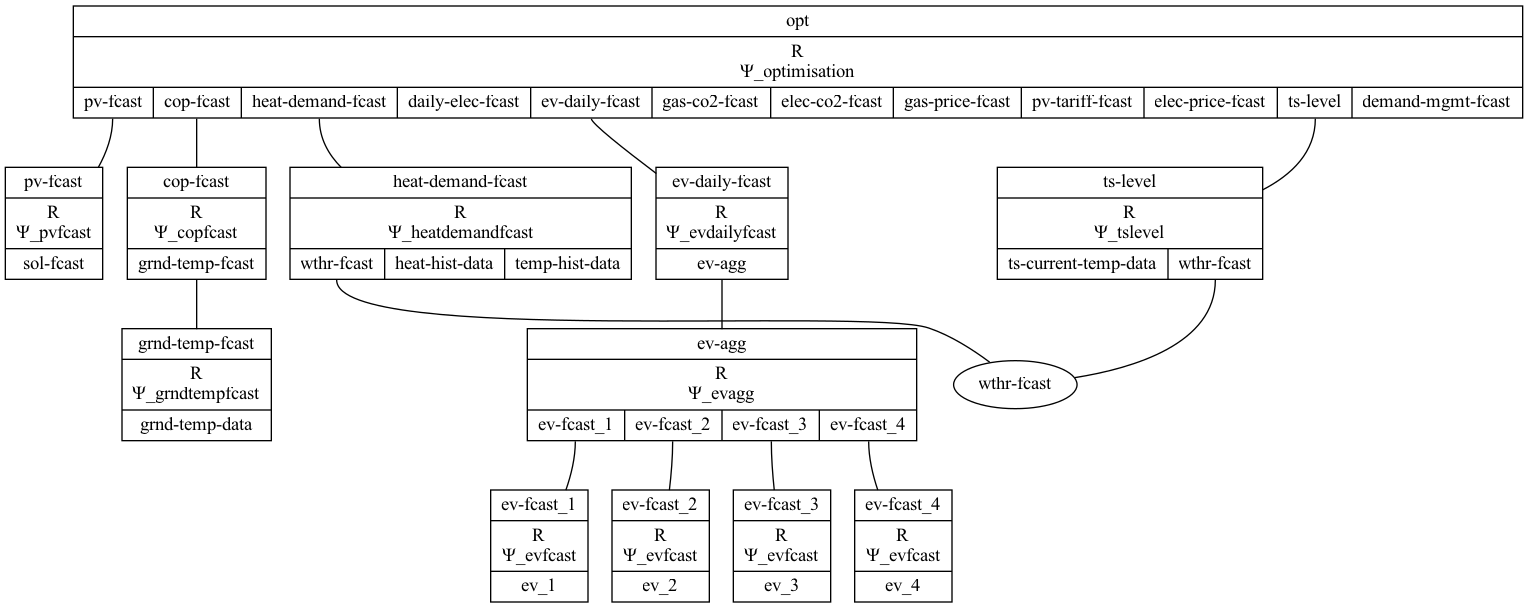

In [13]:
opt_hn = from_YAML(yaml.safe_load("""
#interpret1:
#    hstype: ALPHA
#    simplex:
#        - opt2
#    psi: interpretation1

#interpret2:
#    hstype: ALPHA
#    simplex:
#        - opt2
#    psi: interpretation2

#interpret3:
#    hstype: ALPHA
#    simplex:
#        - opt2
#    psi: interpretation3

#opt2:
#    hstype: ALPHA
#    simplex:
#        - pv-fcast
#        - cop-fcast
#        - heat-demand-fcast
#        - daily-elec-fcast
        #- ev-demand-fcast
#        - ev-daily-fcast
        #- elec-avail
#        - gas-co2-fcast
#        - elec-co2-fcast
#        - gas-price-fcast
#        - pv-tariff-fcast
#        - elec-price-fcast
#        - ts-level
#        - demand-mgmt-fcast
#        - opt
#    partOf:
#        - interpret1
#        - interpret2
#        - interpret3
#    psi: optimisation2

opt:
    hstype: ALPHA
    simplex:
        - pv-fcast
        - cop-fcast
        - heat-demand-fcast
        - daily-elec-fcast
        #- ev-demand-fcast
        - ev-daily-fcast
        #- elec-avail
        - gas-co2-fcast
        - elec-co2-fcast
        - gas-price-fcast
        - pv-tariff-fcast
        - elec-price-fcast
        - ts-level
        - demand-mgmt-fcast
#    partOf:
#        - opt2
    psi: optimisation

demand-mgmt-fcast:
    hstype: VERTEX
    partOf:
        - opt
        - opt2
    psi: demandmgmtfcast

gas-co2-fcast:
    hstype: VERTEX
    partOf:
        - opt
        - opt2
    psi: gasco2fcast

elec-co2-fcast:
    hstype: VERTEX
    partOf:
        - opt
        - opt2
    psi: elecco2fcast

gas-price-fcast:
    hstype: VERTEX
    partOf:
        - opt
        - opt2
    psi: gaspricefcast

pv-tariff-fcast:
    hstype: VERTEX
    partOf:
        - opt
        - opt2
    psi: pvtarifffcast

elec-price-fcast:
    hstype: VERTEX
    partOf:
        - opt
        - opt2
    psi: elecpricefcast

sol-fcast:
    hstype: VERTEX
    partOf:
        - pv-fcast
    psi: solfcast

pv-fcast:
    hstype: ALPHA
    simplex:
        - sol-fcast
    partOf:
        - opt
        - opt2
    psi: pvfcast

grnd-temp-data:
    hstype: VERTEX
    partOf:
        - grnd-temp-fcast
    psi: grndtempdata

grnd-temp-fcast:
    hstype: ALPHA
    simplex:
        - grnd-temp-data
    partOf:
        - cop-fcast
    psi: grndtempfcast

cop-fcast:
    hstype: ALPHA
    simplex:
        - grnd-temp-fcast
    partOf:
        - opt
        - opt2
    psi: copfcast

wthr-fcast:
    hstype: VERTEX
    partOf:
        - heat-demand-fcast
        - ts-level
    psi: wthrfcast

ts-level:
    hstype: ALPHA
    simplex:
        - ts-current-temp-data
        - wthr-fcast
    partOf:
        - opt
        - opt2
    psi: tslevel

ts-current-temp-data:
    hstype: VERTEX
    partOf:
        - ts-level
    psi: tscurrenttempdata

heat-hist-data:
    hstype: VERTEX
    partOf:
        - heat-demand-fcast
    psi: heathistdata

temp-hist-data:
    hstype: VERTEX
    partOf:
        - heat-demand-fcast
    psi: temphistdata

heat-demand-fcast:
    hstype: ALPHA
    simplex:
        - wthr-fcast
        - heat-hist-data
        - temp-hist-data
        # - heat-hist-normalise
    partOf:
        - opt
        - opt2
    psi: heatdemandfcast

ev_1:
    hstype: VERTEX
    partOf:
        - ev-fcast_1
    psi: evdata

ev-fcast_1:
    hstype: ALPHA
    simplex:
        - ev_1
    partOf:
        - ev-agg
    psi: evfcast

ev_2:
    hstype: VERTEX
    partOf:
        - ev-fcast_2
    psi: evdata

ev-fcast_2:
    hstype: ALPHA
    simplex:
        - ev_2
    partOf:
        - ev-agg
    psi: evfcast

ev_3:
    hstype: 0
    partOf:
        - ev-fcast_3
    psi: evdata

ev-fcast_3:
    hstype: ALPHA
    simplex:
        - ev_3
    partOf:
        - ev-agg
    psi: evfcast

ev_4:
    hstype: 0
    partOf:
        - ev-fcast_4
    psi: evdata

ev-fcast_4:
    hstype: ALPHA
    simplex:
        - ev_4
    partOf:
        - ev-agg
    psi: evfcast

ev-agg:
    hstype: ALPHA
    simplex:
        - ev-fcast_1
        - ev-fcast_2
        - ev-fcast_3
        - ev-fcast_4
    partOf:
        - ev-daily-fcast
    psi: evagg

ev-daily-fcast:
    hstype: ALPHA
    simplex:
        - ev-agg
    partOf:
        - opt
        - opt2
    psi: evdailyfcast

daily-elec-fcast:
    hstype: VERTEX
#    simplex:
#        - build-elec-fcast-1yr
    partOf:
        - opt
        - opt2
    psi: dailyelecfcast

#build-elec-fcast-1yr:
#    hstype: VERTEX
#    partOf:
#        - daily-elec-fcast
#    psi: buildelecfcast1yr

#output-check:
#    hstype: ALPHA
#    simplex:
#        - true-plant-op
#        - priority-fcast
#    psi: outputcheck

#true-plant-op:
#    hstype: VERTEX
#    partOf:
#        - output-check
#    psi: trueplantop

#priority-fcast:
#    hstype: VERTEX
#    partOf:
#        - output-check
#    psi: priorityfcast
"""))

# for n, v in opt_hn.hypernetwork.items():
#     print(n, v)

draw_hn(opt_hn, fname=pictures_dir+"opt-hn", view=False, direction="TD", show_vertex=False, show_rel=True)
Image(filename=pictures_dir+'opt-hn.png', width=1500, height=1200)

In [4]:
# hn = Hypernetwork()

# hn.union(greenwich_hn)
# hn.union(opt_hn)

# draw_hn(hn, fname="/tmp/ernest-dence-hn", view=False, direction="LR")
# Image(filename='/tmp/ernest-dence-hn.png', width=1000, height=1200)

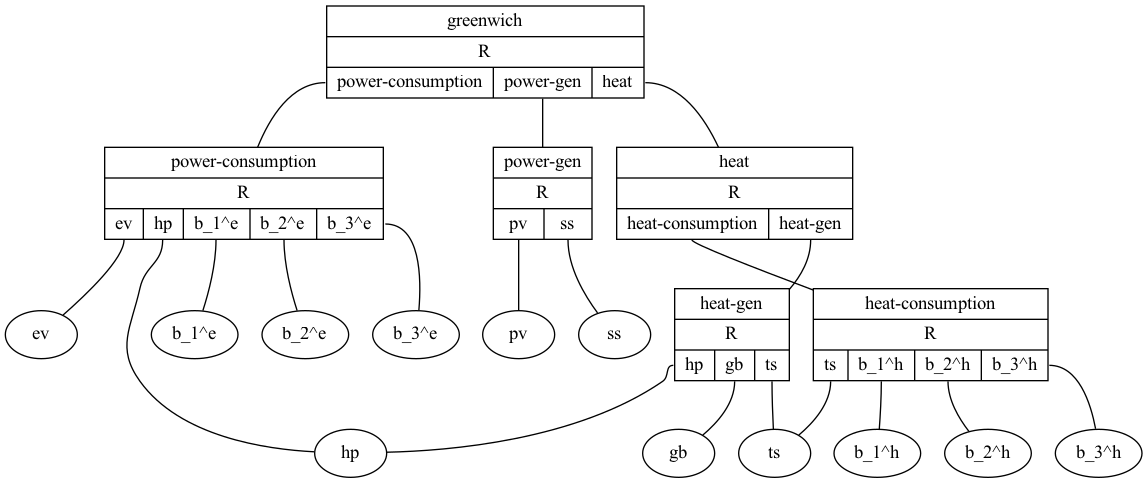

In [5]:
greenwich_hn2 = Hypernetwork()

compile_hn(greenwich_hn2, parser, """
    power-consumption=<ev, hp, b_1^e, b_2^e, b_3^e; R>
    heat-consumption=<ts, b_1^h, b_2^h, b_3^h; R>
    heat-gen=<hp, gb, ts; R>
    power-gen=<pv, ss; R>
    heat=<heat-consumption, heat-gen; R>
    greenwich=<power-consumption, power-gen, heat; R>
""")

draw_hn(greenwich_hn2, fname=pictures_dir+"greenwich-hn2", view=False)
Image(filename=pictures_dir+'greenwich-hn2.png', width=1200, height=1200)

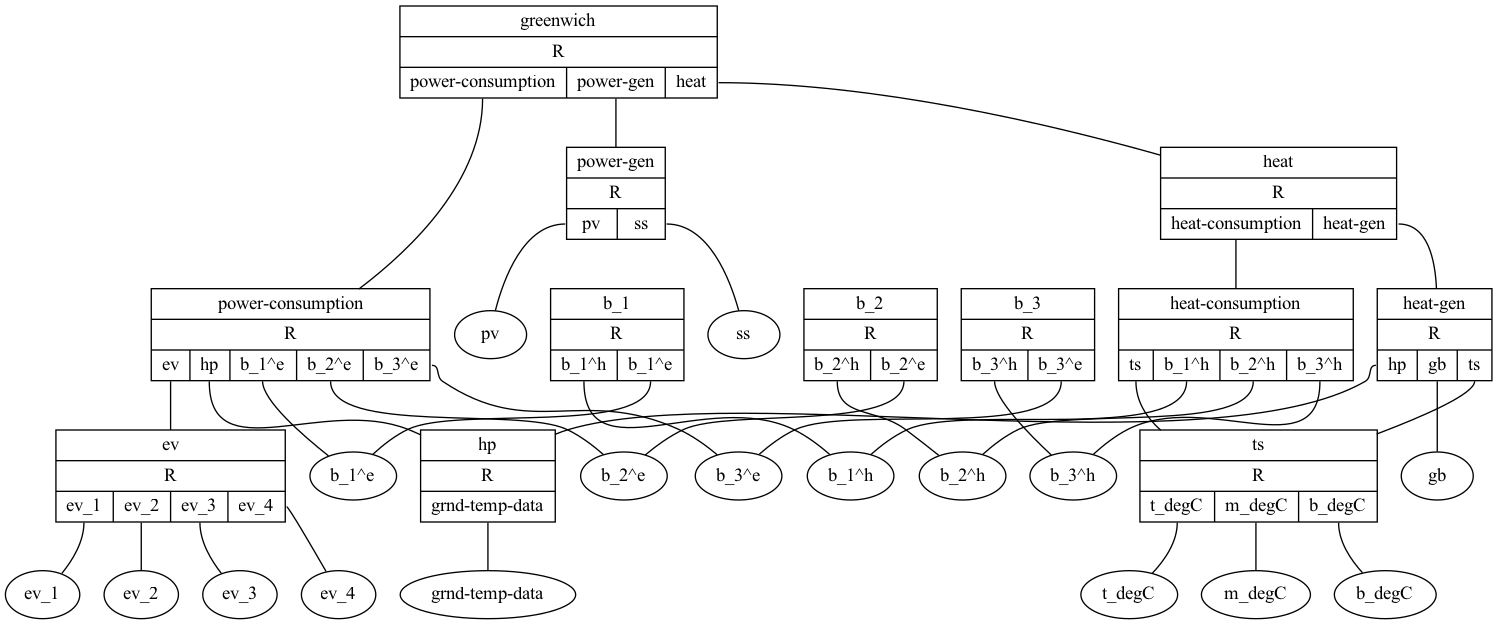

In [6]:
hn3 = Hypernetwork()

compile_hn(hn3, parser, """
    b_1=<b_1^h, b_1^e; R>
    b_2=<b_2^h, b_2^e; R>
    b_3=<b_3^h, b_3^e; R>
    ev=<ev_1, ev_2, ev_3, ev_4; R>
    ts=<t_degC, m_degC, b_degC; R>
    hp=<grnd-temp-data; R>
""")

greenwich_hn2.union(hn3)

draw_hn(greenwich_hn2, fname=pictures_dir+"greenwich-hn2", view=False)
Image(filename=pictures_dir+'greenwich-hn2.png', width=1000, height=1200)

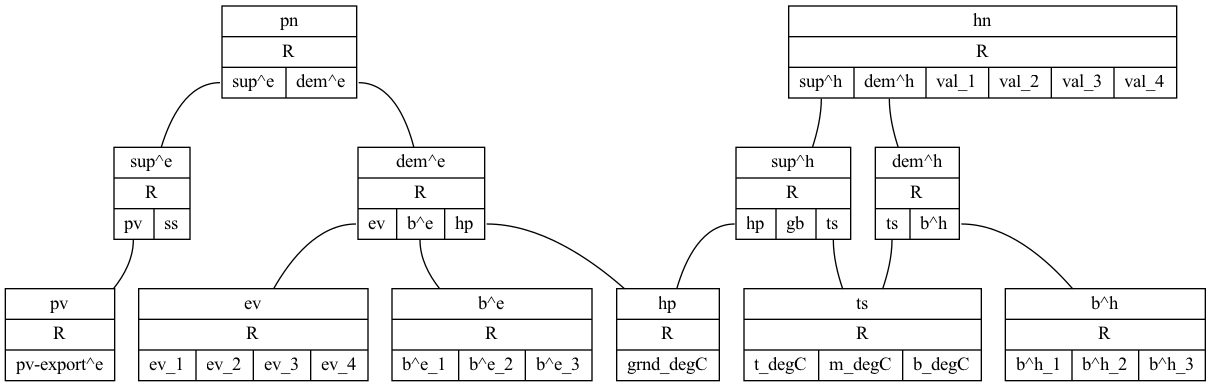

In [7]:
hn4 = Hypernetwork()

compile_hn(hn4, parser, """
    ev=<ev_1, ev_2, ev_3, ev_4; R>
    b^e=<b^e_1, b^e_2, b^e_3; R>
    ts=<t_degC, m_degC, b_degC; R>
    ts=<t_degC, m_degC, b_degC; R>
    b^h=<b^h_1, b^h_2, b^h_3; R>
    hp=<grnd_degC; R>
    pv=<pv-export^e; R>
    sup^e=<pv, ss; R>
    dem^e=<ev, b^e, hp; R>
    sup^h=<hp, gb, ts; R>
    dem^h=<ts, b^h; R>
    pn=<sup^e, dem^e; R>
    hn=<sup^h, dem^h, val_1, val_2, val_3, val_4; R>
""")

draw_hn(hn4, fname=pictures_dir+"hn4", view=False, direction="TD", show_vertex=False)
Image(filename=pictures_dir+'hn4.png', width=1200, height=1200)

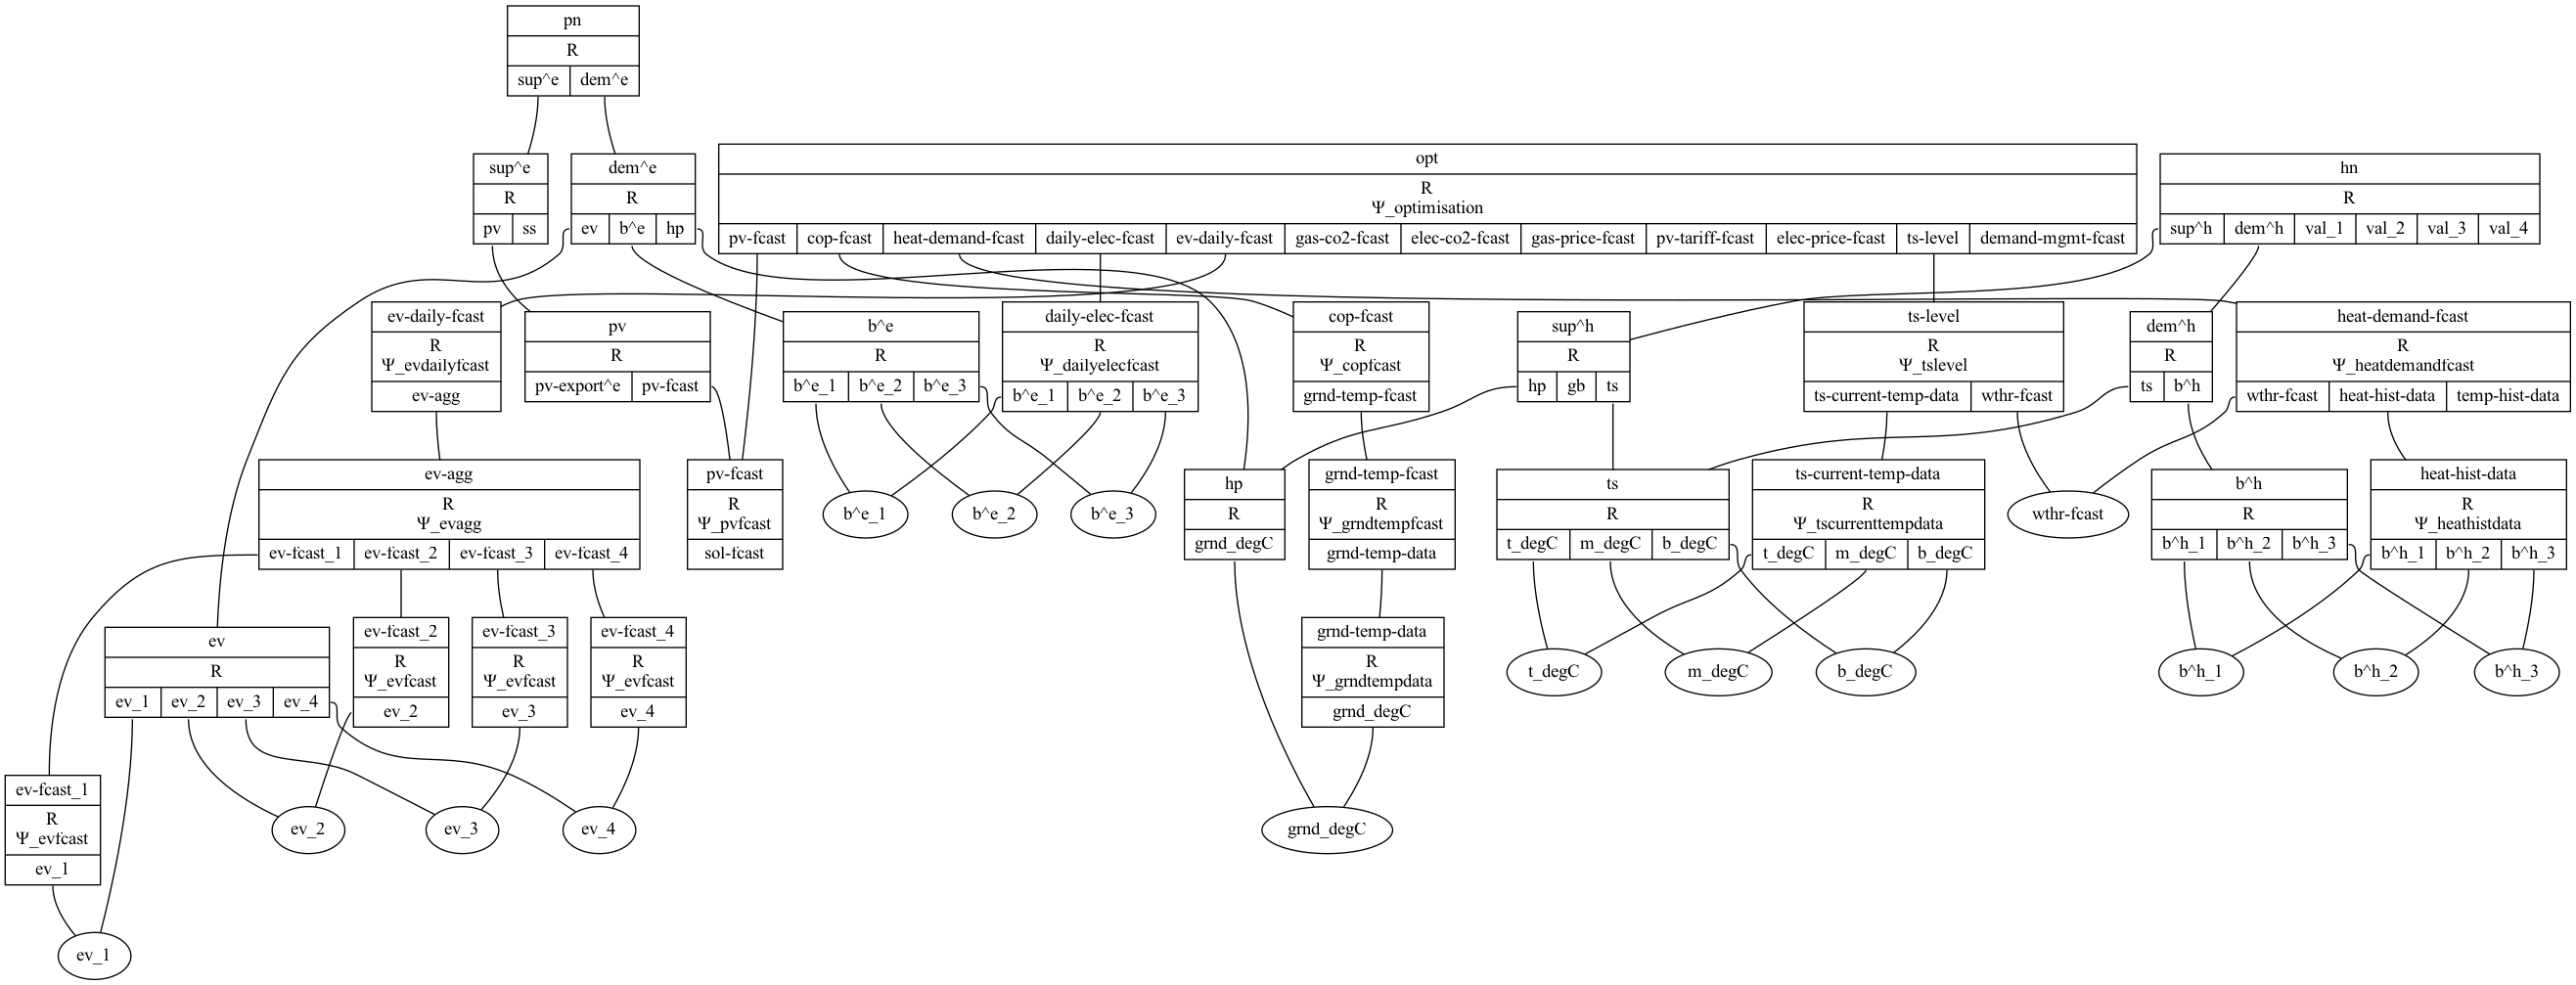

In [8]:
ernest_dence_hn = Hypernetwork()

ernest_dence_hn.union(hn4)
ernest_dence_hn.union(opt_hn)


compile_hn(ernest_dence_hn, parser, """
    ts-current-temp-data=<t_degC, m_degC, b_degC; R>
    heat-hist-data=<b^h_1, b^h_2, b^h_3; R>
    daily-elec-fcast=<b^e_1, b^e_2, b^e_3; R>
    pv=U<pv-fcast; R>
    grnd-temp-data=<grnd_degC; R>
""")

draw_hn(ernest_dence_hn, fname=pictures_dir+"ernest-dence-hn", view=False, direction="TD", show_vertex=False)
Image(filename=pictures_dir+'ernest-dence-hn.png', width=1500, height=1200)